<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

_Author: Unknown_

----
This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [107]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [108]:
pox.dtypes
# date is object need to change to datetime

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [109]:
pox.isnull().sum()
# no NaN

date              0
budapest_cases    0
dtype: int64

**Casting the `'Date'` column to a datetime type**

Use `pd.to_datetime` to convert the `Date` column to a datetime.

**WARNING**: The date column is formated as day-month-year. Does `pd.to_datetime` work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for `pd.to_datetime`, and see if one of the settings fixes things.

In [110]:
pox['date'] = pd.to_datetime(pox['date'],dayfirst=True)

In [111]:
pox.dtypes

date              datetime64[ns]
budapest_cases             int64
dtype: object

**Set the `'Date'` column to be the index**

In [112]:
pox.set_index('date',inplace=True)

In [113]:
pox.head()

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [114]:
pox.index
# earliest day is 2005-01-03
# lastest day is 2014-12-29

DatetimeIndex(['2005-01-03', '2005-01-10', '2005-01-17', '2005-01-24',
               '2005-01-31', '2005-02-07', '2005-02-14', '2005-02-21',
               '2005-02-28', '2005-03-07',
               ...
               '2014-10-27', '2014-11-03', '2014-11-10', '2014-11-17',
               '2014-11-24', '2014-12-01', '2014-12-08', '2014-12-15',
               '2014-12-22', '2014-12-29'],
              dtype='datetime64[ns]', name='date', length=522, freq=None)

**Plot a histogram of the Budapest cases column**

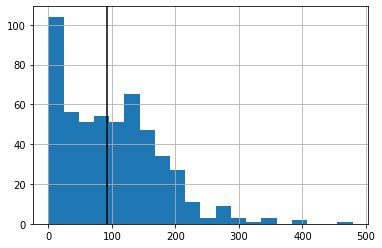

In [115]:
pox['budapest_cases'].hist(bins=20)
plt.axvline(pox['budapest_cases'].median(),color='k');

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the `resample` method on the DataFrame to answer this question.

In [116]:
pox.resample('Y').count()
# most of it is 52 but at 2007,2012 got 53

,budapest_cases
date,
2005-12-31,52
2006-12-31,52
2007-12-31,53
2008-12-31,52
2009-12-31,52
2010-12-31,52
2011-12-31,52
2012-12-31,53
2013-12-31,52


### Visualizations

**Make a line plot of chickenpox cases**

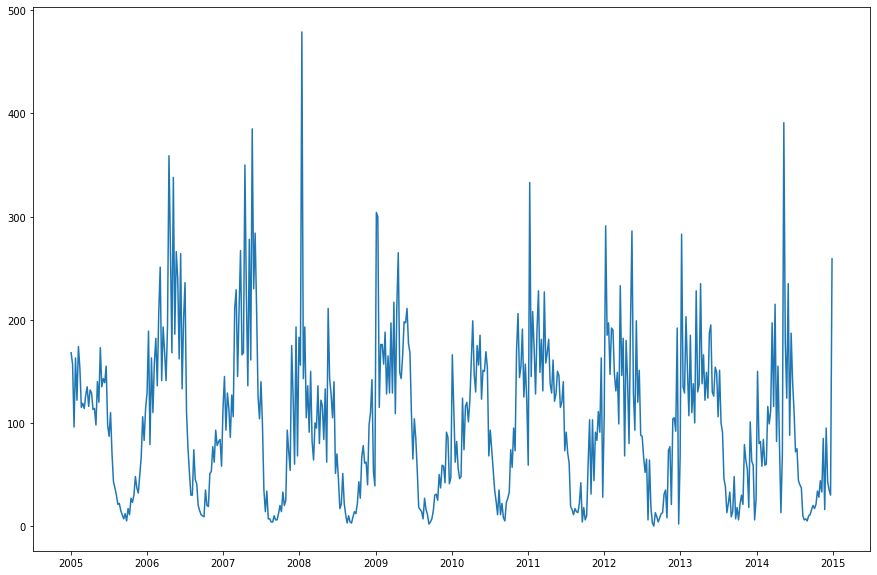

In [117]:
plt.figure(figsize=(15,10))
plt.plot(pox);

**In short answer format, describe any apparent trends**

In [118]:
# chickenpox appear to clustering every years around the first quater of the year.

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

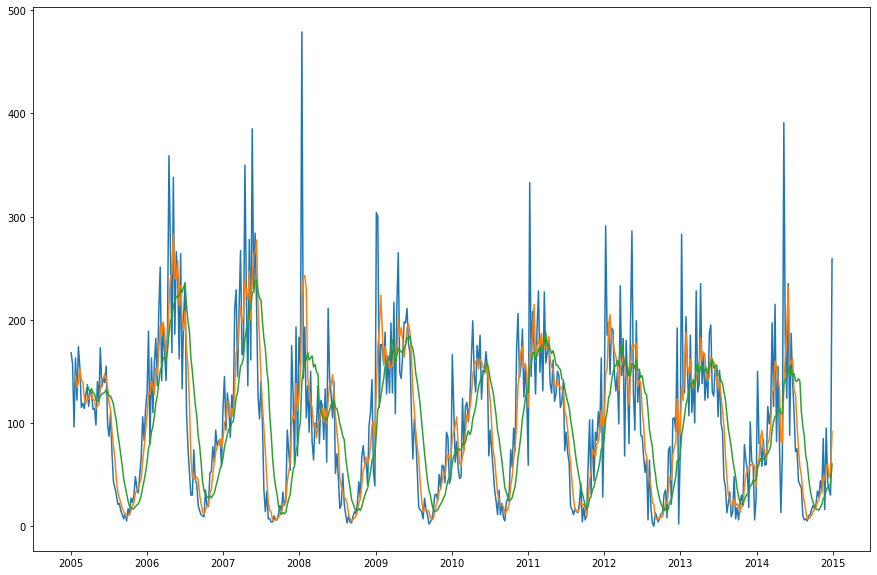

In [119]:
plt.figure(figsize=(15,10))
plt.plot(pox);
plt.plot(pox.rolling(window=4).mean())
plt.plot(pox.rolling(window=12).mean())


### Plot yearly chickenpox cases

You may need to use `resample` again for this.

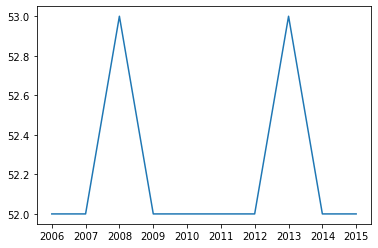

In [120]:
plt.plot(pox.resample('Y').count())
# every 5 years chickem pox cases trend to rise up rapidly.